In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import style
import csv
import math

data    = np.genfromtxt("/content/drive/My Drive/data-nonlinear.txt", delimiter=',')

x_data       = data[:, 0]
y_data       = data[:, 1]
label        = data[:, 2]

x_label0    = x_data[label == 0]
x_label1    = x_data[label == 1]

y_label0    = y_data[label == 0]
y_label1    = y_data[label == 1]

#real_corre_space = []
#real_corre_space1 = []
real_corre_space2 = []
for i in range(9999):
  #real_corre_space.append(0)
  #real_corre_space1.append(0)
  real_corre_space2.append(0)

theta = []
new_theta = []
ramda = 100
mul_theta = []
#result_space = []
#result_space1 = []
#result_space2 = []
result_space_null = []
#corre_space = []
#corre_space1 = []
corre_space2 = []
gradient_theta = []
result = 0
corre_num = 0

for i in range(10000):
  mul_theta.append(0)

for i in range(100):
  theta.append(0)
  new_theta.append(0)
  gradient_theta.append(0)

m = float(len(x_data))

learning_rate = float(0.001)

J0 = 0
space1 = []

for i in range(10000):
  
  #if result != 0:
  #  result_space_null.append(result)
    
  for j in range(len(x_data)):
    x = x_data[j]
    y = y_data[j]
    l = label[j]

    J0 = 0

    for k in range(100):
      J0 += theta[k] * (x ** (k // 10)) * (y ** (k % 10))

    sub_func = 1 / (1 + np.exp( -1 * (J0)))
    

    for p in range (len(gradient_theta)):
      gradient_theta[p] += ( (sub_func - l) * (x ** (p//10)) * ( y ** (p%10) )) / m

  for j in range(len(theta)):
    new_theta[j] =  ( ( 1 - (learning_rate * ramda) ) * theta[j] ) - (learning_rate * gradient_theta[j])
    gradient_theta[j] = float(0)
    theta[j] = new_theta[j]

  #for j in range(len(x_data)):
  #  x = x_data[j]
  #  y = y_data[j]
  #  l = label[j]
  #
  #  result = 0
  #  J0 = 0
  #
  #  for k in range(100):
  #    J0 += theta[k] * (x ** (k // 10)) * (y ** (k % 10))
  #
  #  sub_func = 1 / (1 + np.exp( -1 * (J0)))
  #
  #  if 1 - sub_func == 0:
  #    sub_func = 0.99999
  #  
  #  result += ( (-1 * l * np.log( sub_func )) - ( ( 1 - l ) * ( np.log( 1 - sub_func ) ) ) ) / m
  #
  #result += (ramda / 2) * mul_theta[i]
  if corre_num != 0:
    corre_space2.append(corre_num)

  corre_num = 0

  for j in range(len(x_data)):
    x = x_data[j]
    y = y_data[j]
    l = label[j]
    tem = 0

    for k in range(100):
      tem += theta[k] * (x ** (k // 10)) * (y ** (k % 10))
    
    if tem <= 0:
      basis = 0
      if basis == l:
        corre_num = corre_num + 1
    elif tem > 0:
      basis = 1
      if basis == l:
        corre_num = corre_num + 1
    



**Task 1**

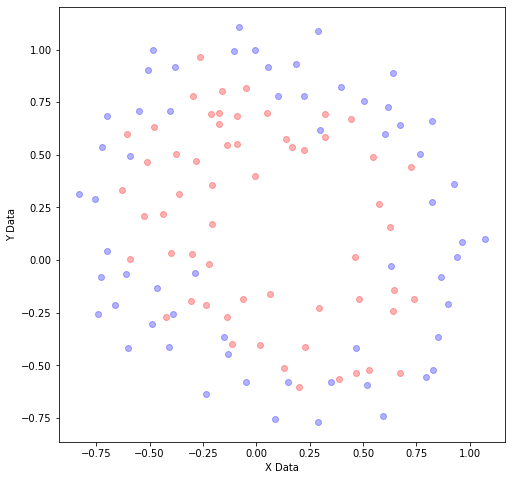

In [0]:

plt.figure(figsize=(8, 8))
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

**Task 2**

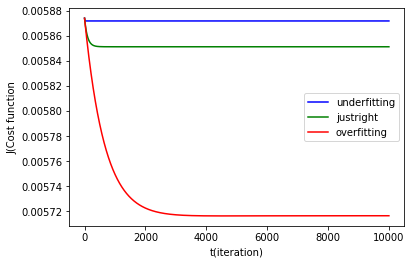

In [0]:
x = range(9999)
plt.xlabel('t(iteration)')
plt.ylabel('J(Cost function')
plt.plot(x, result_space, 'blue', label='underfitting')
plt.plot(x, result_space1, 'green', label='justright')
plt.plot(x, result_space2, 'red', label='overfitting')
plt.legend(loc = 0)
plt.show()

**Task 3**

In [0]:
C_END     = "\033[0m"
C_BOLD    = "\033[1m"
C_INVERSE = "\033[7m"
 
C_RED    = "\033[31m"
C_GREEN  = "\033[32m"
C_BLUE   = "\033[34m"

print(C_BOLD + C_RED + "'over fitting : ramda =   1일 때 Cost function ='" + C_END, result_space2[9998])
print(C_BOLD + C_GREEN + "'just   right : ramda =  10일 때 Cost function ='" + C_END , result_space1[9998])
print(C_BOLD + C_BLUE + "'underfitting : ramda = 100일 때 Cost function ='" + C_END, result_space[9998])

'over fitting : ramda =   1일 때 Cost function =' 0.005716342871883173
'just   right : ramda =  10일 때 Cost function =' 0.005851132888843574
'underfitting : ramda = 100일 때 Cost function =' 0.005871727462704028


**Task 4**

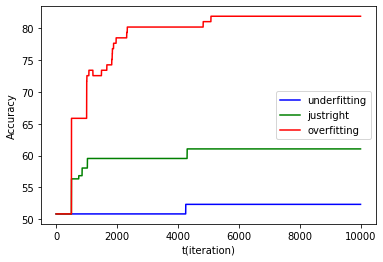

In [0]:
#for i in range (len(corre_space)):
  #real_corre_space[i] = (corre_space[i] / m) * 100
  #real_corre_space1[i] = (corre_space1[i] / m) * 100
  #real_corre_space2[i] = (corre_space2[i] / m) * 100

x = range(9999)
plt.xlabel('t(iteration)')
plt.ylabel('Accuracy')
plt.plot(x, real_corre_space2, 'blue', label='underfitting')
plt.plot(x, real_corre_space1, 'green', label='justright')
plt.plot(x, real_corre_space, 'red', label='overfitting')
plt.legend(loc = 0)
plt.show()

**Task 5**

In [0]:
C_END     = "\033[0m"
C_BOLD    = "\033[1m"
C_INVERSE = "\033[7m"
 
C_RED    = "\033[31m"
C_GREEN  = "\033[32m"
C_BLUE   = "\033[34m"

print(C_BOLD + C_RED + "'over fitting : ramda =   1일 때 Accuracy ='" + C_END, real_corre_space[9998])
print(C_BOLD + C_GREEN + "'just   right : ramda =  10일 때 Accuracy ='" + C_END , real_corre_space1[9998])
print(C_BOLD + C_BLUE + "'underfitting : ramda = 100일 때 Accuracy ='" + C_END, real_corre_space2[9998])

'over fitting : ramda =   1일 때 Accuracy =' 81.86440677966101
'just   right : ramda =  10일 때 Accuracy =' 61.047457627118646
'underfitting : ramda = 100일 때 Accuracy =' 52.347457627118644


**Task6**